## Support Vector Machine
## Wine Fraud

Most common fraud tactic is wines are adultrated with some chemicals or some juices and sweetners.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.count().isnull()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

## Unique Values in the Column Quality

Quality column contains couple of values 'Legit and 'Fraud'
From the graph the, Fraud count is less.

Indicates the red and white wine and their respective quality count

In [5]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [34]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

## Value Counts

From the value counts, and the graph, we can see the Fraud counts are very less compared to Legit counts
More than 6k Legit count data and only 246 fraud counts => Imbalanced Data

<Axes: xlabel='quality', ylabel='count'>

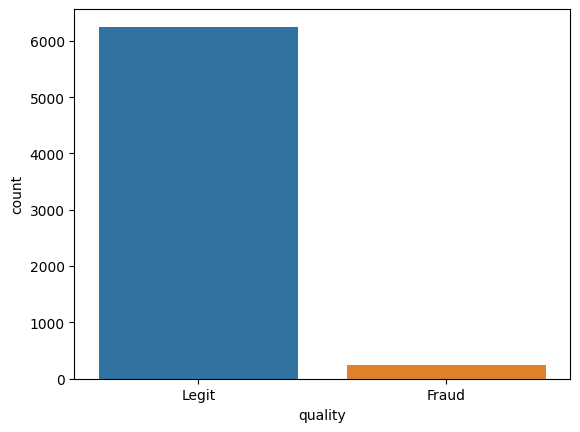

In [6]:
sns.countplot(data=df,x='quality', hue='quality' )

<Axes: xlabel='type', ylabel='count'>

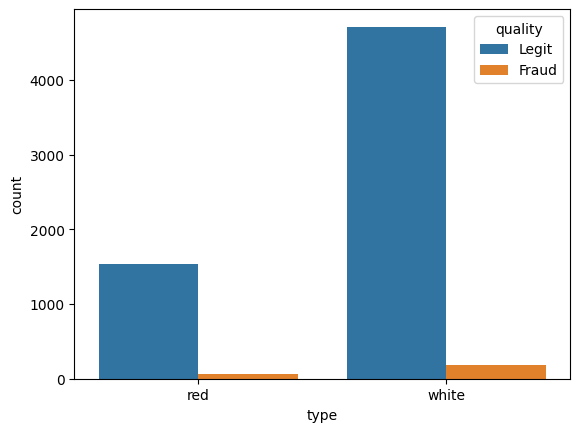

In [7]:
sns.countplot(data=df,x='type', hue='quality' )

In [8]:
#Below Method is Boolean Indexing
total_red = df[df['type'] == 'red']
red_wine_fraud = df[(df['type']=='red') & (df['quality'] == 'Fraud')] 

#Fraud Red Wine Percent
(len(red_wine_fraud)/len(total_red))*100

3.9399624765478425

In [9]:
#Same operation using query
red_fraud = df.query(' type == "red" and quality == "Fraud" ' )
red_total = df.query(' type == "red" ')

(len(red_fraud.index)/len(red_total.index))*100

3.9399624765478425

## Percentage Fraud in White Wine
Using loc method

In [10]:
total_white = df.loc[df['type'] == 'white']
white_wine_fraud = df.loc[(df['type'] == 'white') & (df['quality'] == 'Fraud')]

(len(white_wine_fraud.index)/len(total_white.index))*100

3.7362188648427925

# Fraud Percent
Both red and white wines have similar Fraud percentages, 3.9 and 3.7 respectively

In [14]:
# Mapping Fraud Column to ) and 1
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

df.corr(numeric_only=True)['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

<Axes: >

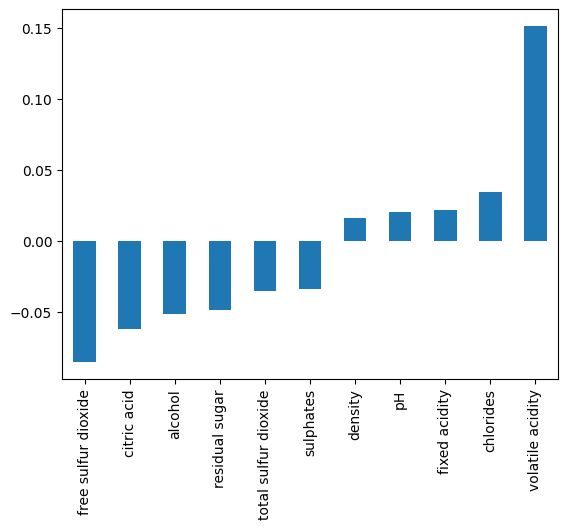

In [18]:

df.corr(numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar')


<Figure size 800x800 with 0 Axes>

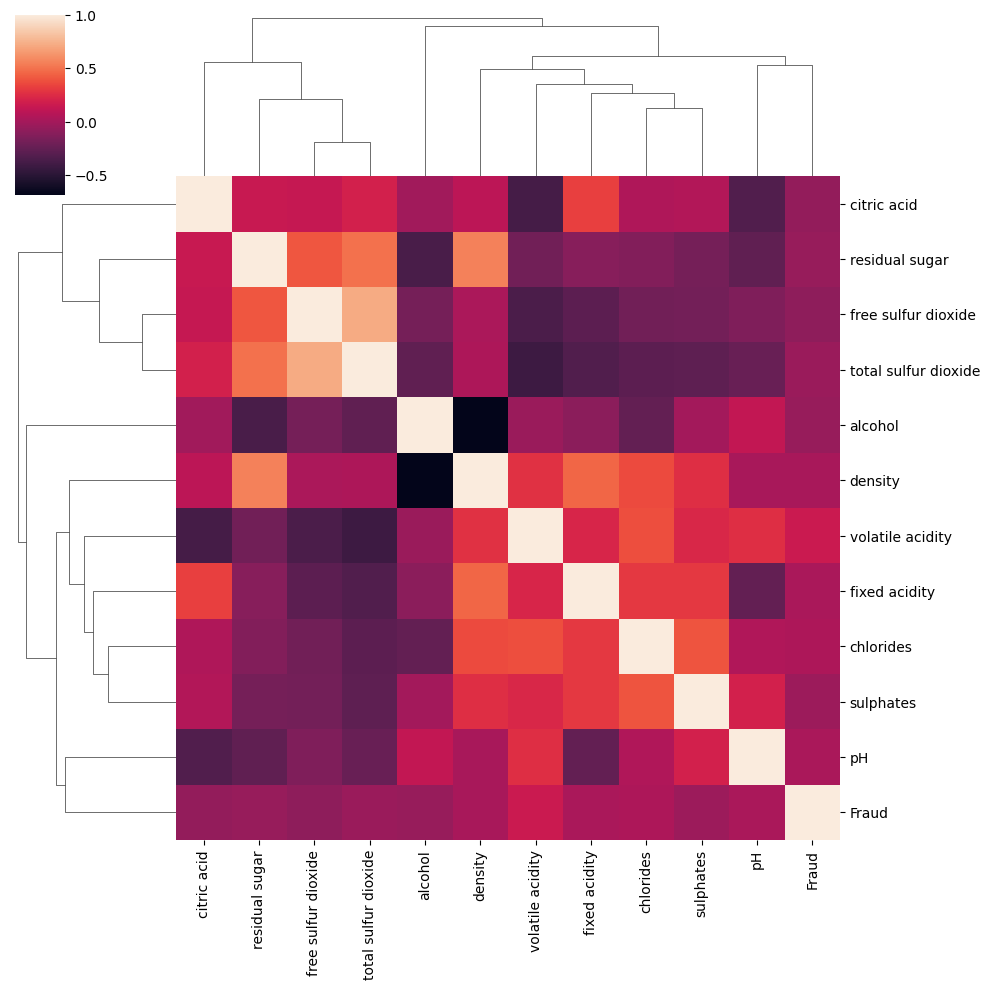

In [19]:
plt.figure(figsize=(8,8), dpi=100)
sns.clustermap(data=df.corr(numeric_only=True))

<Axes: >

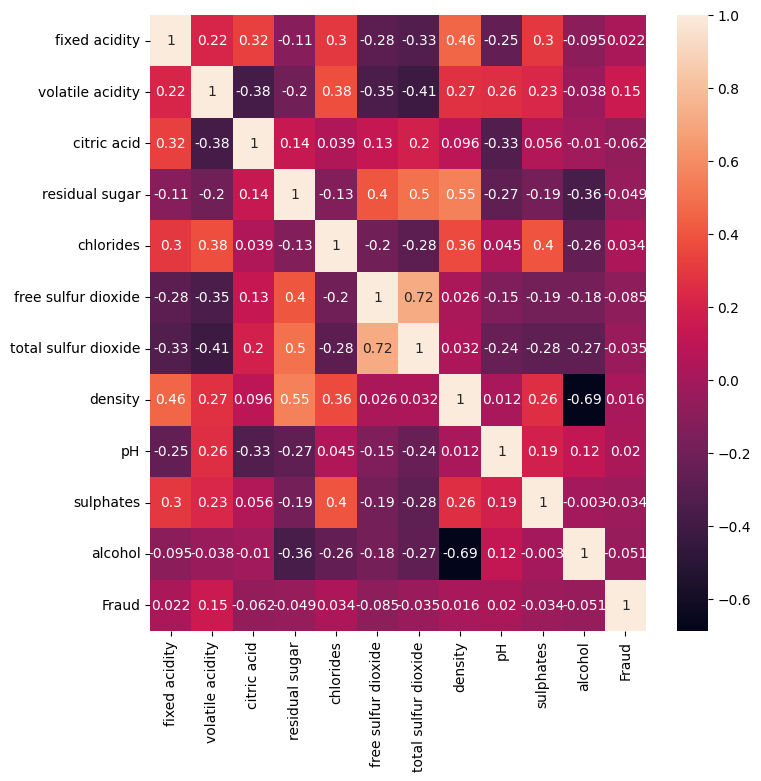

In [20]:
plt.figure(figsize=(8,8), dpi=100)
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

In [23]:
""" 
Type Column belongs to Binary Category: Variables can have only two outcomes red/white so this can be reset to a single column

The conversion of Categorical Variables into Dummy Variables leads to the formation of the two-dimensional binary matrix 
where each column represents a particular category.
"""
df['type'] = pd.get_dummies(df['type'], drop_first=True)
#df['type']
df = df.drop('Fraud', axis=1)

In [24]:
X = df.drop('quality', axis=1)
y = df['quality']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=101)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.svm import SVC
""" 
AS THE CLASSES ARE NOT BALANCED EVENLY using CLASS_WEIGHT
Here the Fraud is given bit more weights during training for regularization

class_weight : dict or 'balanced', default=None
    Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one.
      The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
      in the input data as n_samples / (n_classes * np.bincount(y))
"""
model = SVC(class_weight='balanced')


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'degree': [2,3,4],
              'kernel':['linear', 'poly', 'rbf'],
              'gamma':['scale','auto']
              }

grid = GridSearchCV(model,param_grid)
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [30]:
grid.best_params_

{'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [36]:
y_pred = grid.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

confusion_matrix(y_test,y_pred)

array([[  3,  24],
       [  6, 617]], dtype=int64)

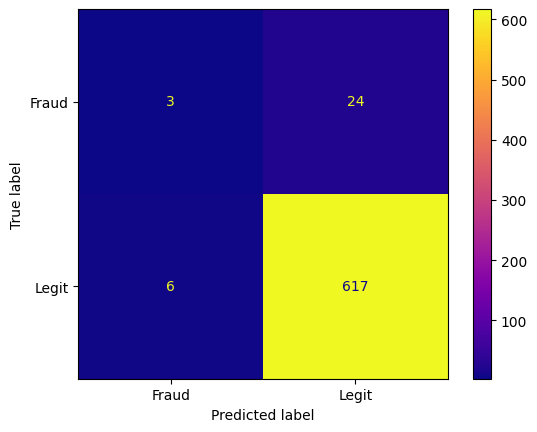

In [39]:
ConfusionMatrixDisplay.from_estimator(grid, X_test_scaled,y_test, cmap='plasma')

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.33      0.11      0.17        27
       Legit       0.96      0.99      0.98       623

    accuracy                           0.95       650
   macro avg       0.65      0.55      0.57       650
weighted avg       0.94      0.95      0.94       650



# precision and recall
It is quite low for Fraud data, implying lower f1-score.